## Hough Lines Using (y = mx+b) and by iterating through (voting for) m and b

### imports

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### main variables

In [2]:
image_path = '../images/road.jpg'
# image_path = '../images/hey.png'

### functions

In [3]:
#Source: https://stackoverflow.com/a/42314798

def plotimage(img, title=None, figsize=None):
    h = img.shape[0]
    w = img.shape[1]
    dpi = 80
    if figsize is None:
        figsize = w / float(dpi), h / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])    
    ax.axis('off')
    ax.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.show()

### code

### Read Image

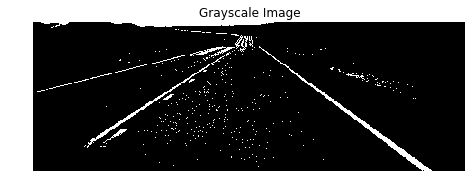

In [4]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
threshold = 100
gray[gray<threshold] = 0
gray[gray>=threshold] = 1
bw = gray
plotimage(bw, 'Grayscale Image')

### Vote

In [5]:
min_m = -50
max_m = -min_m
step_m = 0.1

max_b = 2*max(gray.shape)
min_b = -max_b
step_b = 1

m_vals = np.arange(min_m, max_m, step_m)
b_vals = np.arange(min_b,max_b,step_b)

In [6]:
def draw_line(x,y):
    '''
    Returns a new image where the line b=-x*m+y is drawn on it
    '''
    
    res_im = np.zeros(shape=(len(m_vals),len(b_vals)), dtype='int')
    m0 = m_vals[0]
    m1 = m_vals[-1]
    b0=-x*m0+y
    b1=-x*m1+y

    b0 = int((b0- min_b)/step_b)
    b1 = int((b1- min_b)/step_b)
    m0 = int((m0- min_m)/step_m)
    m1 = int((m1- min_m)/step_m)

    cv2.line(res_im,(b0,m0), (b1,m1),1,1)
    
    return res_im

100.0%


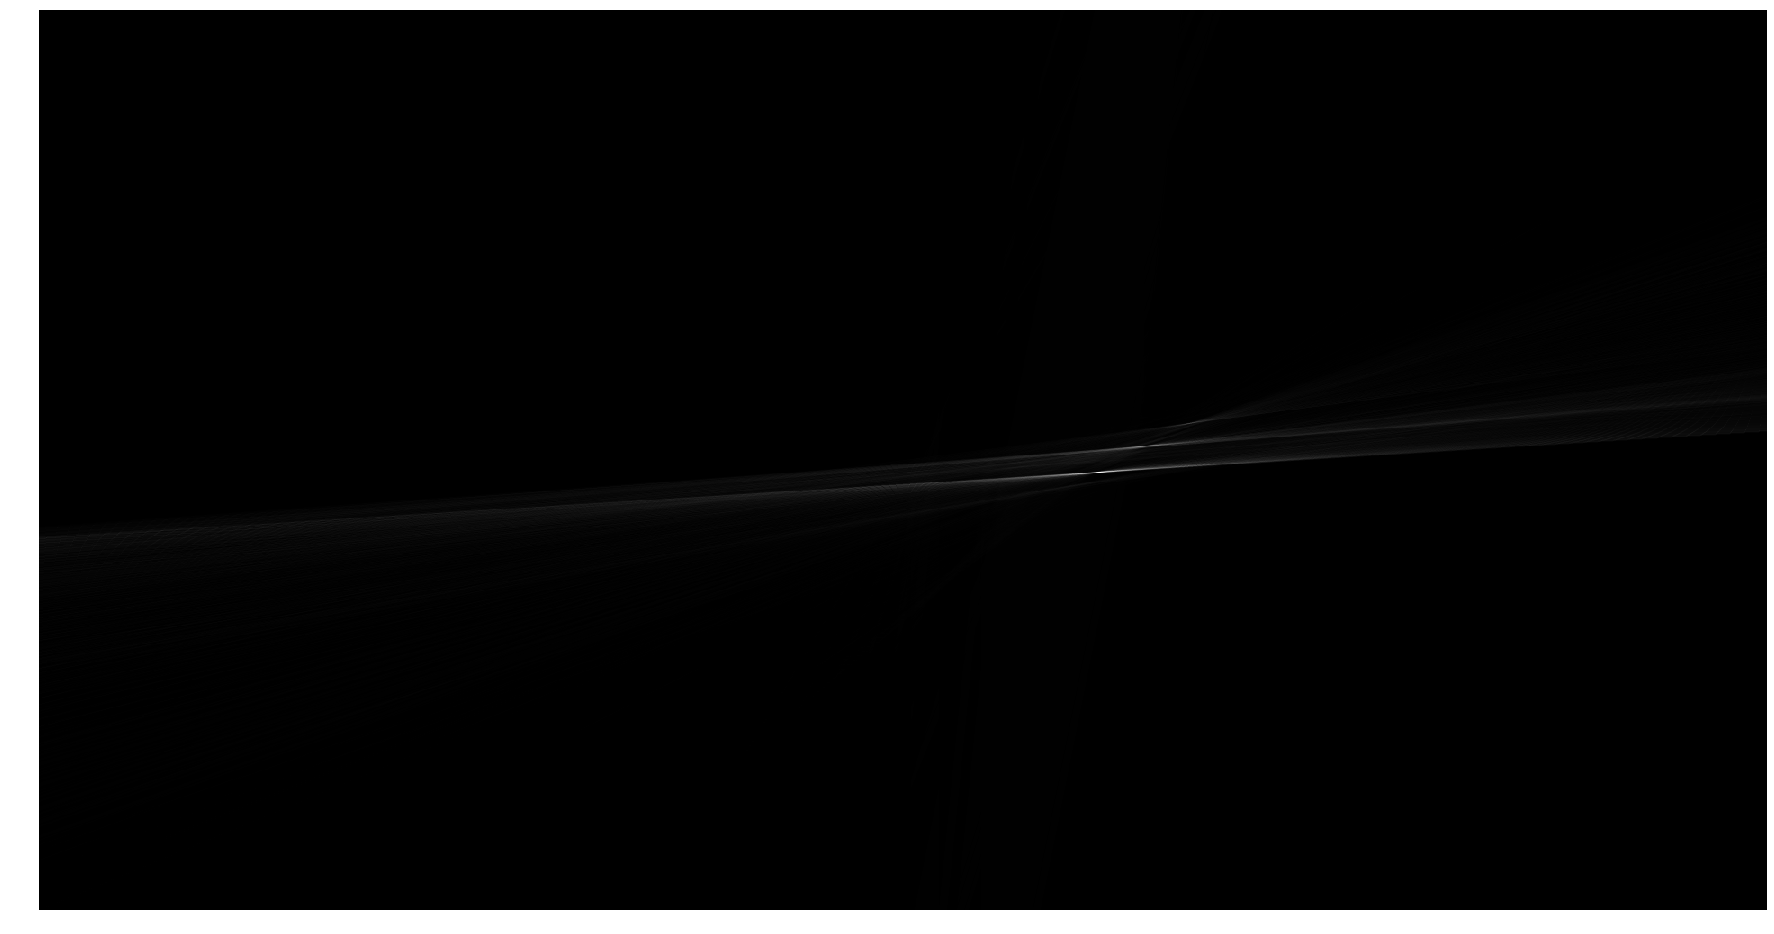

In [7]:
from IPython.display import clear_output


votes = np.zeros(shape=(len(m_vals),len(b_vals)), dtype='int')
prev_percentage = percentage = None

for x in range(bw.shape[0]):
    for y in range(bw.shape[1]):
        if bw[x,y]:                        
            mask = draw_line(x,y)
            votes = votes + mask
    prev_percentage = percentage
    percentage = x/(bw.shape[0]-1)
    clear_output(wait=True)
    print("{:.1%}".format(percentage)),
        
plotimage(votes)

### Draw first N lines each in an image

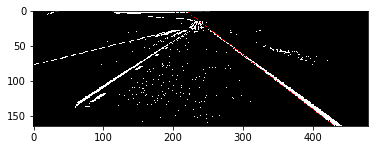

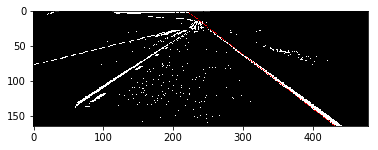

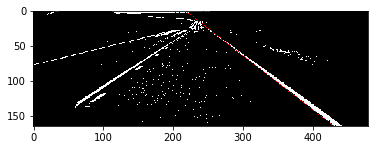

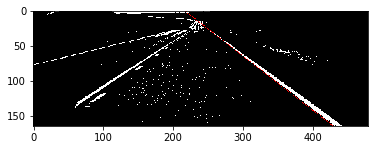

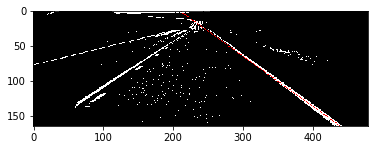

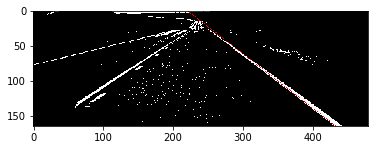

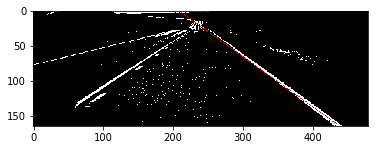

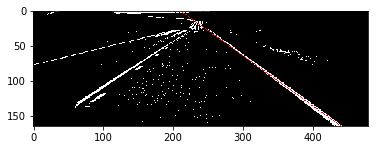

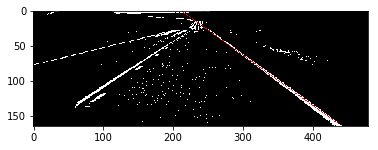

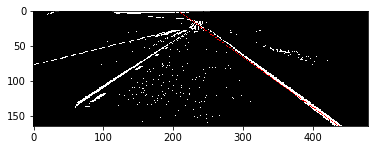

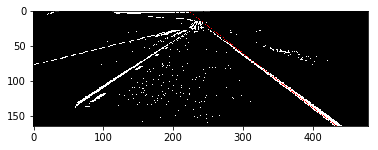

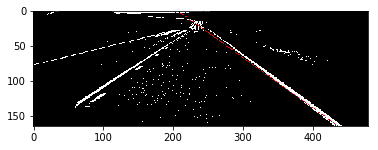

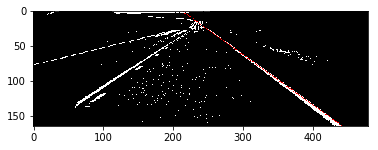

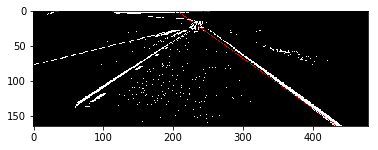

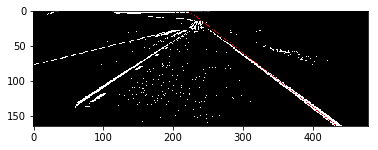

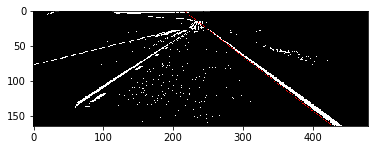

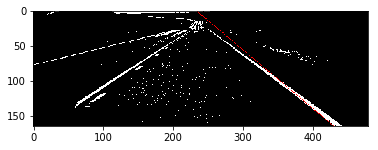

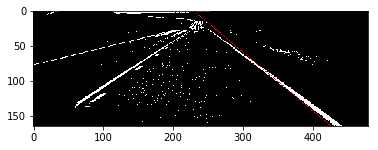

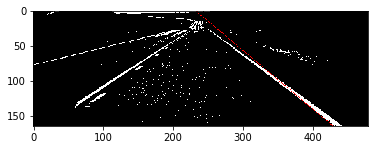

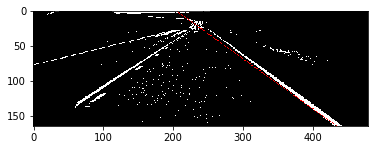

In [8]:
def draw_max(image, votes, color = (255,0,0), skip=False):
    m0,b0 = np.unravel_index(votes.argmax(), votes.shape)
    votes[m0,b0] = 0
    if skip:
        return
    
    b = b0*step_b + min_b
    m = m0*step_m + min_m

    x0 = 0
    x1 = bw.shape[0]
    y0 = int(m*x0 + b)
    y1 = int(m*x1 + b)

    cv2.line(image, (y0,x0), (y1,x1),  color, 1)


image = votes.copy()
N = 20
for i in range(N):
    colored = cv2.cvtColor(bw*255, cv2.COLOR_GRAY2BGR)
    draw_max(colored, image, (255,0,0), False)
    plt.figure()
    plt.imshow(colored)

### Draw first N hough lines in 1 image

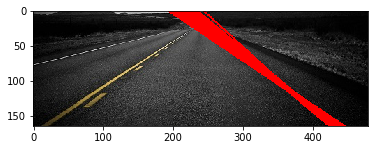

In [9]:
image = votes.copy()
im = img.copy()
N = 50
for i in range(N):
    draw_max(im, image, 255, False)

plt.figure()
plt.imshow(im)

### Apply Opencv's HoughLines functions

(1, 2)


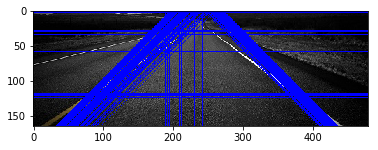

In [10]:
im = img.copy()

lines = cv2.HoughLines(bw, 0.001, np.pi/360, 0)
for i in range(100):
    for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(im,(x1,y1),(x2,y2),(0,0,255),1)

plt.imshow(im)
print(lines[0].shape)